In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [27]:
# loading the IRIS dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

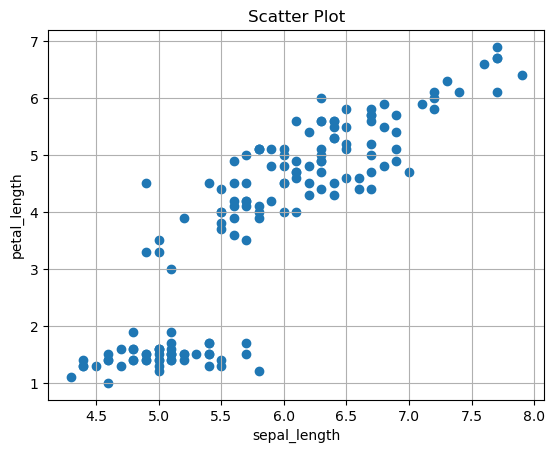

In [45]:
# plotting with python 
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'])
# adding the aesthectics 
plt.title('Scatter Plot')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.grid()

#Show the plot
plt.show()


Text(0, 0.5, 'petal_length')

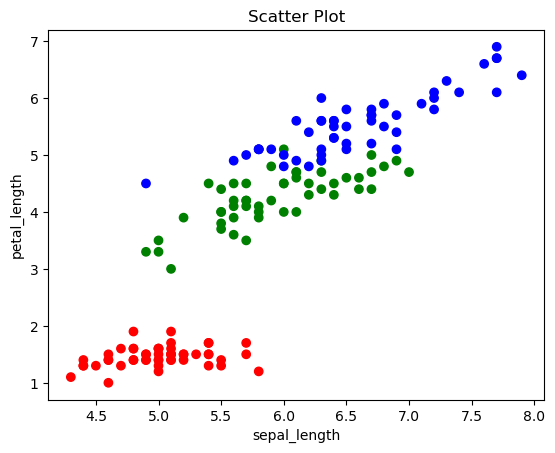

In [53]:
#Coloring the plot based on the type of species  
colors = {0:'r', 1:'g', 2:'b'}
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'],c=df['target'].map(colors))

# adding the aesthectics 
plt.title('Scatter Plot')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')


### Logistic Regression with one vs rest approach

In [108]:
X = df[['sepal length (cm)','sepal width (cm)']].values.reshape(150,2)
y = iris.target_names[iris.target] == 'virginica'

In [109]:
y_new = y.reshape(150,1)

In [110]:
# Split the data into training/testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 101)

In [111]:
# Create a linear regression object
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)



LogisticRegression(random_state=42)

##### Plotting the decision boundary

In [ ]:
x_index = 0
y_index = 1

Text(0, 0.5, 'sepal width')

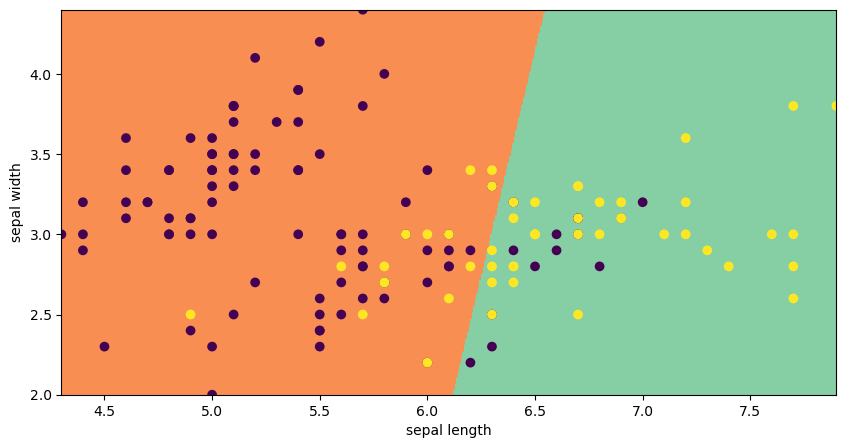

In [121]:
x0, x1 = np.meshgrid(
    np.linspace(iris.data[:, x_index].min(), iris.data[:, x_index].max(), 500).reshape(-1, 1),
    np.linspace(iris.data[:, y_index].min(), iris.data[:, y_index].max(), 500).reshape(-1, 1)
)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = log_reg.predict(X_new)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(10, 5))
plt.contourf(x0, x1, zz, cmap=plt.cm.Spectral)
plt.scatter(X[:,0], X[:,1], c=y)

plt.xlabel('sepal length')
plt.ylabel('sepal width')

### Multinomial Logistic Regression

In [138]:
X_multi = df[['sepal length (cm)','sepal width (cm)']].values.reshape(150,2)
y_multi = df['target'].values

In [139]:
# Split the data into training/testing sets (80:20 split)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size= 0.20, random_state= 101)

In [144]:
# default regularization is l2 with alpha of 1, by putting c = 30 (inverse of alpha)
#I am decreaing the regularization coefficient
log_reg_multi = LogisticRegression(C=30,random_state=42)
log_reg_multi.fit(X_train_multi, y_train_multi)

LogisticRegression(C=30, random_state=42)

##### Plotting the decision boundary

In [141]:
x_index = 0
y_index = 1

Text(0, 0.5, 'sepal width')

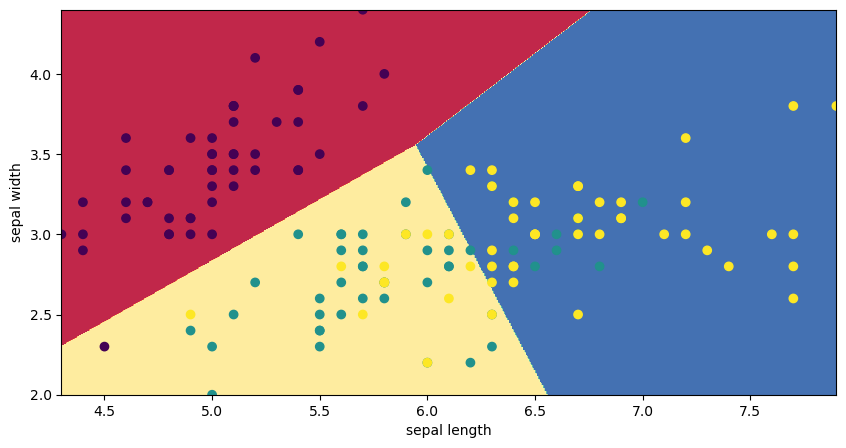

In [142]:
x0, x1 = np.meshgrid(
    np.linspace(iris.data[:, x_index].min(), iris.data[:, x_index].max(), 500).reshape(-1, 1),
    np.linspace(iris.data[:, y_index].min(), iris.data[:, y_index].max(), 500).reshape(-1, 1)
)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = log_reg_multi.predict(X_new)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(10, 5))
plt.contourf(x0, x1, zz, cmap=plt.cm.Spectral)
plt.scatter(X_multi[:,0], X_multi[:,1], c=y_multi)

plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [143]:
y_pred

array([1, 1, 1, ..., 2, 2, 2])